## Final Project Submission

Please fill out:
* Student name: Julia Njambi Karanja
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## 1. Business Understanding

King county is a county in Washington state with the highest population of 2,269,675 according to the 2020 census. 

The role as a data scientist is to review the King county sales housing data and give a report to one of the real estate agency to help them understand the real estate industry. 

In addition, we will also compe up with predictive models that will help the agency to effectively predict their sales.

There are number of success metrics in real estate agencies which include: 

   * Average commission per sale/ Sales in the agency
   
   * Sold homes per available inventory
   
   * Year to year variance on average sold price
   
   * Year to year variance on sold average dollar per square foot
   
   * Number of Days a property is on the market
   
   * Average commission per sales person
   
   * Number of properties advertised per real estate agent        

We shall therefore use the data available to conduct an analysis guided by some of the listed success metrics above.

Our main aim for this analysis is to help the real estate agency to have a better understanding of the real estate industry in King county and to help them come up with realistic sales targets and better pricing models.

## 2. Data Understanding

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 2.1 Description of the data used


In [3]:
Description = pd.read_csv('data/Description.csv',header=0,squeeze=True,dtype=str,keep_default_na=False,encoding='unicode_escape')

pd.set_option('max_colwidth', 400)

Description

,id,Unique identifier for a house
0,date,Date house was sold
1,price,Sale price (prediction target)
2,bedrooms,Number of bedrooms
3,bathrooms,Number of bathrooms
4,sqft_living,Square footage of living space in the home
5,sqft_lot,Square footage of the lot
6,floors,Number of floors (levels) in house
7,waterfront,"Whether the house is on a waterfront (Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts)"
8,view,"Quality of view from house(Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other)"
9,condition,How good the overall condition of the house is. Related to maintenance of house.


In [4]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
data
halfway-there.gif
student.ipynb


In [5]:
# Read kc_house_data csv file

df = pd.read_csv('data/kc_house_data.csv')

with pd.option_context("display.max_columns", None):
    
    print(display(df))
    
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# shape of the data

df.shape

(21597, 21)

In [7]:
#first 5 rows of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
#last 5 rows of the data
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# statistical details of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## 3. Data Preparation

### 3.1 Selecting the Data

As mentioned earlier we will focus on some success metrics and this has guided our basis of selecting our data from the King county housing sales data. 

The success metrics we will use are:

   * Sales in the county
   
   * Year to year variance on average sold price
   
   * Year to year variance on sold average dollar per square foot
   
   * Number of Days a property is on the market
   
In addition we will also create regression models that will establish whether there is any causal effect between various variables included in the data set. These models can also help in predictive analysis that would help in budget and forecasting.


   #### Continuous Data:
   1. Price of the houses
   2. Square footage of the lot
   2. Square footage of the living space of the home
   3. Number of Bedrooms per house
   4. Number of Bathrooms per house
     

#### Categorical Data:
   1. Date
   2. Condition
   3. Year Built
   4. waterfront
   5. view


#### 3.1.1 Creating a  Data Frame for the Selected Data

In [12]:
#create a new data frame for the data to be used in the analysis
new_data = df.loc[:, ["date", "price", "sqft_lot", "sqft_living", "sqft_above", "bedrooms", "bathrooms", "condition", "yr_built", "waterfront", "view"]]
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view
0,10/13/2014,221900.0,5650,1180,1180,3,1.00,Average,1955,NaN,NONE
1,12/9/2014,538000.0,7242,2570,2170,3,2.25,Average,1951,NO,NONE
2,2/25/2015,180000.0,10000,770,770,2,1.00,Average,1933,NO,NONE
3,12/9/2014,604000.0,5000,1960,1050,4,3.00,Very Good,1965,NO,NONE
4,2/18/2015,510000.0,8080,1680,1680,3,2.00,Average,1987,NO,NONE
...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1131,1530,1530,3,2.50,Average,2009,NO,NONE
21593,2/23/2015,400000.0,5813,2310,2310,4,2.50,Average,2014,NO,NONE
21594,6/23/2014,402101.0,1350,1020,1020,2,0.75,Average,2009,NO,NONE
21595,1/16/2015,400000.0,2388,1600,1600,3,2.50,Average,2004,NaN,NONE


### 3.2 Data Cleaning

#### 3.2.1 Missing Value Treatment

Missing data in the housing data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

In [13]:
# Checking for null values in the selected data set
new_data.isnull().sum()

date              0
price             0
sqft_lot          0
sqft_living       0
sqft_above        0
bedrooms          0
bathrooms         0
condition         0
yr_built          0
waterfront     2376
view             63
dtype: int64

In [14]:
# Replacing the null values in the selected data set using mode

new_data = new_data.fillna(new_data.mode().iloc[0])

new_data.isnull().sum()


date           0
price          0
sqft_lot       0
sqft_living    0
sqft_above     0
bedrooms       0
bathrooms      0
condition      0
yr_built       0
waterfront     0
view           0
dtype: int64

In [15]:
# Rounding off the bathroom values to whole numbers

new_data = new_data.round()
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view
0,10/13/2014,221900.0,5650,1180,1180,3,1.0,Average,1955,NO,NONE
1,12/9/2014,538000.0,7242,2570,2170,3,2.0,Average,1951,NO,NONE
2,2/25/2015,180000.0,10000,770,770,2,1.0,Average,1933,NO,NONE
3,12/9/2014,604000.0,5000,1960,1050,4,3.0,Very Good,1965,NO,NONE
4,2/18/2015,510000.0,8080,1680,1680,3,2.0,Average,1987,NO,NONE
...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1131,1530,1530,3,2.0,Average,2009,NO,NONE
21593,2/23/2015,400000.0,5813,2310,2310,4,2.0,Average,2014,NO,NONE
21594,6/23/2014,402101.0,1350,1020,1020,2,1.0,Average,2009,NO,NONE
21595,1/16/2015,400000.0,2388,1600,1600,3,2.0,Average,2004,NO,NONE


#### 3.2.2 Outliers Treatment

Outliers in the housing data set can drastically change the results of the data analysis and statistical modeling. 
There are numerous unfavourable impacts of outliers in the data set:

   * It increases the error variance and reduces the power of statistical tests
   
   * If the outliers are non-randomly distributed, they can decrease normality

   * They can bias or influence estimates that may be of substantive interest

   * They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
   
In this case we will use boxplots to identify the outliers.

##### 3.2.2.1 Price

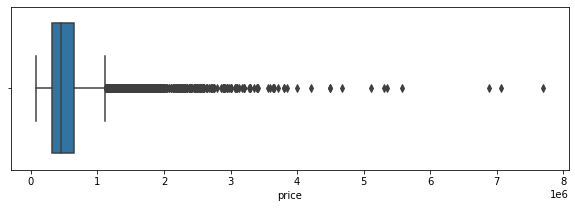

In [16]:
# identify the price outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'price', data = new_data)

# Display the plot
plt.show()

In [17]:
# Remove price outliers

new_price= (new_data['price'])[(np.abs(stats.zscore(new_data['price'])) < 3)]

new_price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21191, dtype: float64

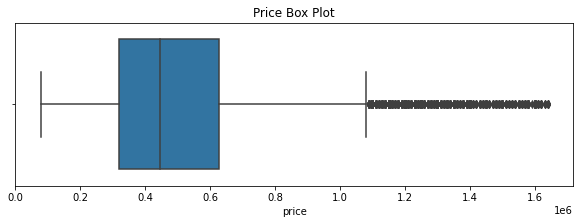

In [18]:
# Review the new price data
plt.figure(figsize=(10,3))

sns.boxplot(x = new_price)

plt.title('Price Box Plot')
           

# Display the plot
plt.show()

##### 3.2.2.2 Sqft_lot

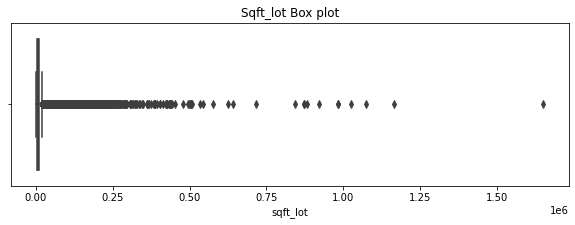

In [19]:
# identify the sqft_lot outliers
plt.figure(figsize=(10,3))
sns.boxplot(x = 'sqft_lot', data = new_data)

plt.title('Sqft_lot Box plot')
# Display the plot
plt.show()

In [20]:
# Remove sqft_lot outliers

sqft_lot = new_data['sqft_lot']

new_sqft_lot = sqft_lot[(np.abs(stats.zscore(sqft_lot)) < 5)]

new_sqft_lot

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21592     1131
21593     5813
21594     1350
21595     2388
21596     1076
Name: sqft_lot, Length: 21449, dtype: int64

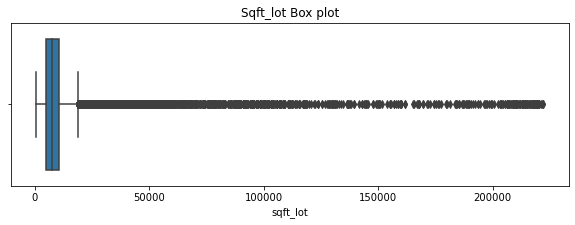

In [21]:
# Review the new sqft_lot data
plt.figure(figsize=(10,3))
sns.boxplot(x = new_sqft_lot)

plt.title('Sqft_lot Box plot')
# Display the plot
plt.show()

##### 3.2.2.3 Sqft_living

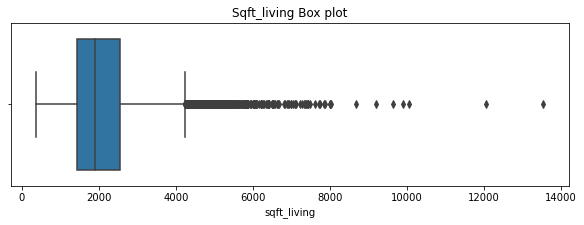

In [22]:
# identify the sqft_living outliers
plt.figure(figsize=(10,3))
sns.boxplot(x = 'sqft_living', data = new_data)

plt.title('Sqft_living Box plot')
# Display the plot
plt.show()

In [23]:
# Remove sqft_living outliers

sqft_living = new_data['sqft_living']

new_sqft_living = sqft_living[(np.abs(stats.zscore(sqft_living)) < 5)]

new_sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21562, dtype: int64

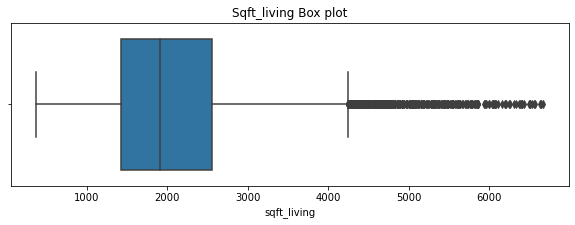

In [24]:
# Review the new sqft_living data
plt.figure(figsize=(10,3))
sns.boxplot(x = new_sqft_living)

plt.title('Sqft_living Box plot')
# Display the plot
plt.show()

##### 3.2.2.4 Sqft_above

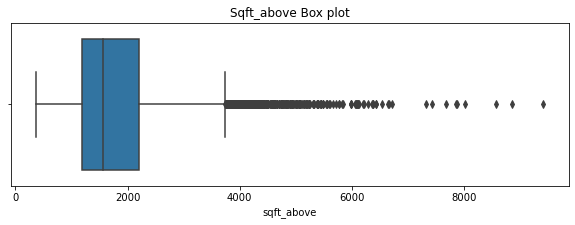

In [25]:
# identify the sqft_above outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'sqft_above', data = new_data)

plt.title('Sqft_above Box plot')

# Display the plot
plt.show()

In [26]:
sqft_above = new_data['sqft_above']

new_sqft_above = sqft_above[(np.abs(stats.zscore(sqft_above)) < 5)]

new_sqft_above

0        1180
1        2170
2         770
3        1050
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_above, Length: 21565, dtype: int64

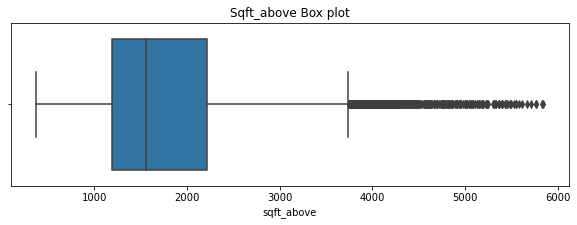

In [27]:
plt.figure(figsize=(10,3))

sns.boxplot(x = new_sqft_above)

plt.title('Sqft_above Box plot')
# Display the plot
plt.show()

##### 3.2.2.5 Bedrooms 

Text(0.5, 1.0, 'Bedrooms Box plot')

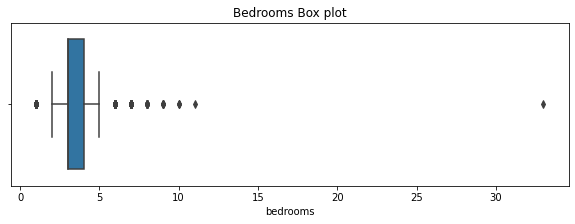

In [28]:
# identify the bedrooms and bathrooms outliers

plt.figure(figsize=(10,3))

sns.boxplot(x = 'bedrooms', data= new_data)

plt.title('Bedrooms Box plot')

In [29]:
# Remove bedrooms and bathrooms outliers

bedrooms = new_data['bedrooms']

new_bedrooms = bedrooms[(np.abs(stats.zscore(bedrooms)) < 3)]

new_bedrooms

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21535, dtype: int64

Text(0.5, 1.0, 'Bedrooms Box plot')

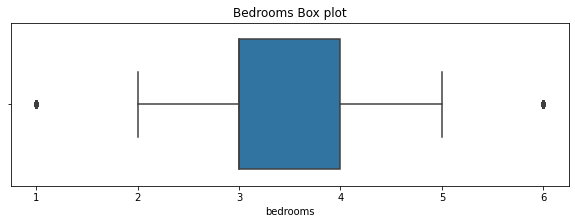

In [30]:

plt.figure(figsize=(10,3))

sns.boxplot(x = new_bedrooms)

plt.title('Bedrooms Box plot')

##### 3.2.2.6 Bathrooms 

Text(0.5, 1.0, 'Bathrooms Box plot')

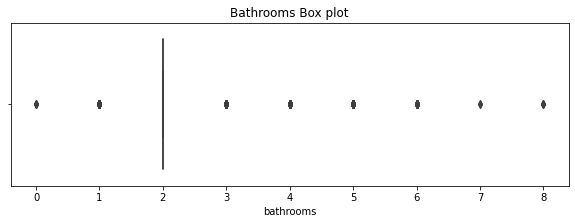

In [31]:
plt.figure(figsize=(10,3))

sns.boxplot(x = 'bathrooms', data= new_data)

plt.title('Bathrooms Box plot')

In [32]:
bathrooms = new_data['bathrooms']

new_bathrooms = bathrooms[(np.abs(stats.zscore(bathrooms)) < 5)]

new_bathrooms

0        1.0
1        2.0
2        1.0
3        3.0
4        2.0
        ... 
21592    2.0
21593    2.0
21594    1.0
21595    2.0
21596    1.0
Name: bathrooms, Length: 21567, dtype: float64

Text(0.5, 1.0, 'Bathrooms Box plot')

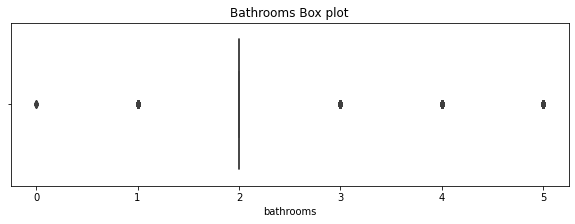

In [33]:
plt.figure(figsize=(10,3))

sns.boxplot(x = new_bathrooms)

plt.title('Bathrooms Box plot')

#### 3.2.3 Separating Date to Months and Years

##### 3.2.3.1 Date

In [34]:
# Separate the date into months and year

new_data['date']=pd.to_datetime(new_data['date'])
new_data['year']=new_data['date'].apply(lambda x: x.year)
new_data['month']=new_data['date'].apply(lambda x: x.month)
new_data

,date,price,sqft_lot,sqft_living,sqft_above,bedrooms,bathrooms,condition,yr_built,waterfront,view,year,month
0,2014-10-13,221900.0,5650,1180,1180,3,1.0,Average,1955,NO,NONE,2014,10
1,2014-12-09,538000.0,7242,2570,2170,3,2.0,Average,1951,NO,NONE,2014,12
2,2015-02-25,180000.0,10000,770,770,2,1.0,Average,1933,NO,NONE,2015,2
3,2014-12-09,604000.0,5000,1960,1050,4,3.0,Very Good,1965,NO,NONE,2014,12
4,2015-02-18,510000.0,8080,1680,1680,3,2.0,Average,1987,NO,NONE,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,1131,1530,1530,3,2.0,Average,2009,NO,NONE,2014,5
21593,2015-02-23,400000.0,5813,2310,2310,4,2.0,Average,2014,NO,NONE,2015,2
21594,2014-06-23,402101.0,1350,1020,1020,2,1.0,Average,2009,NO,NONE,2014,6
21595,2015-01-16,400000.0,2388,1600,1600,3,2.0,Average,2004,NO,NONE,2015,1


#### 3.2.3 Intergrate Data

Now that we have replaced the missing values and removed the various outliers in our data, we are now going to merge the data and format it so that we can proceed to analyse the data.

In [35]:
kc_data = pd.concat([new_price, new_sqft_lot, new_sqft_living, new_sqft_above, new_bathrooms, new_bedrooms, (new_data.loc[:, ["condition", "waterfront", "yr_built", "view", "year", "month"]])], axis=1, join='inner')
kc_data

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,condition,waterfront,yr_built,view,year,month
0,221900.0,5650,1180,1180,1.0,3,Average,NO,1955,NONE,2014,10
1,538000.0,7242,2570,2170,2.0,3,Average,NO,1951,NONE,2014,12
2,180000.0,10000,770,770,1.0,2,Average,NO,1933,NONE,2015,2
3,604000.0,5000,1960,1050,3.0,4,Very Good,NO,1965,NONE,2014,12
4,510000.0,8080,1680,1680,2.0,3,Average,NO,1987,NONE,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,1530,1530,2.0,3,Average,NO,2009,NONE,2014,5
21593,400000.0,5813,2310,2310,2.0,4,Average,NO,2014,NONE,2015,2
21594,402101.0,1350,1020,1020,1.0,2,Average,NO,2009,NONE,2014,6
21595,400000.0,2388,1600,1600,2.0,3,Average,NO,2004,NONE,2015,1


### 3.2 Exploratory Data Analysis

#### 3.2.1 Univariate Analysis

##### 3.2.1.1 Continuous Data

The Continuous data in our analysis includes:

  1. Price of the houses

  2. Square footage of the lot

  3. Square footage of the living space of the home
  
  4. Square footage of house apart from basement


In [36]:
# statistical data for our continuous data
kc_data.describe()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,yr_built,year,month
count,2.099000e+04,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000,20990.000000
mean,5.052195e+05,12448.406479,2021.600858,1742.422249,2.023392,3.343116,1970.878418,2014.322630,6.575798
std,2.582753e+05,22240.482923,821.209702,760.118260,0.705387,0.867705,29.287564,0.467494,3.112888
min,7.800000e+04,520.000000,370.000000,370.000000,0.000000,1.000000,1900.000000,2014.000000,1.000000
25%,3.199500e+05,5000.000000,1410.000000,1180.000000,2.000000,3.000000,1951.000000,2014.000000,4.000000
50%,4.450000e+05,7520.000000,1890.000000,1540.000000,2.000000,3.000000,1974.000000,2014.000000,6.000000
75%,6.250000e+05,10370.000000,2493.750000,2150.000000,2.000000,4.000000,1996.000000,2015.000000,9.000000
max,1.640000e+06,222156.000000,6563.000000,5844.000000,5.000000,6.000000,2015.000000,2015.000000,12.000000


###### 3.2.1.1.1 Price

Text(0.5, 0.98, 'Distribution before Log transfomation')

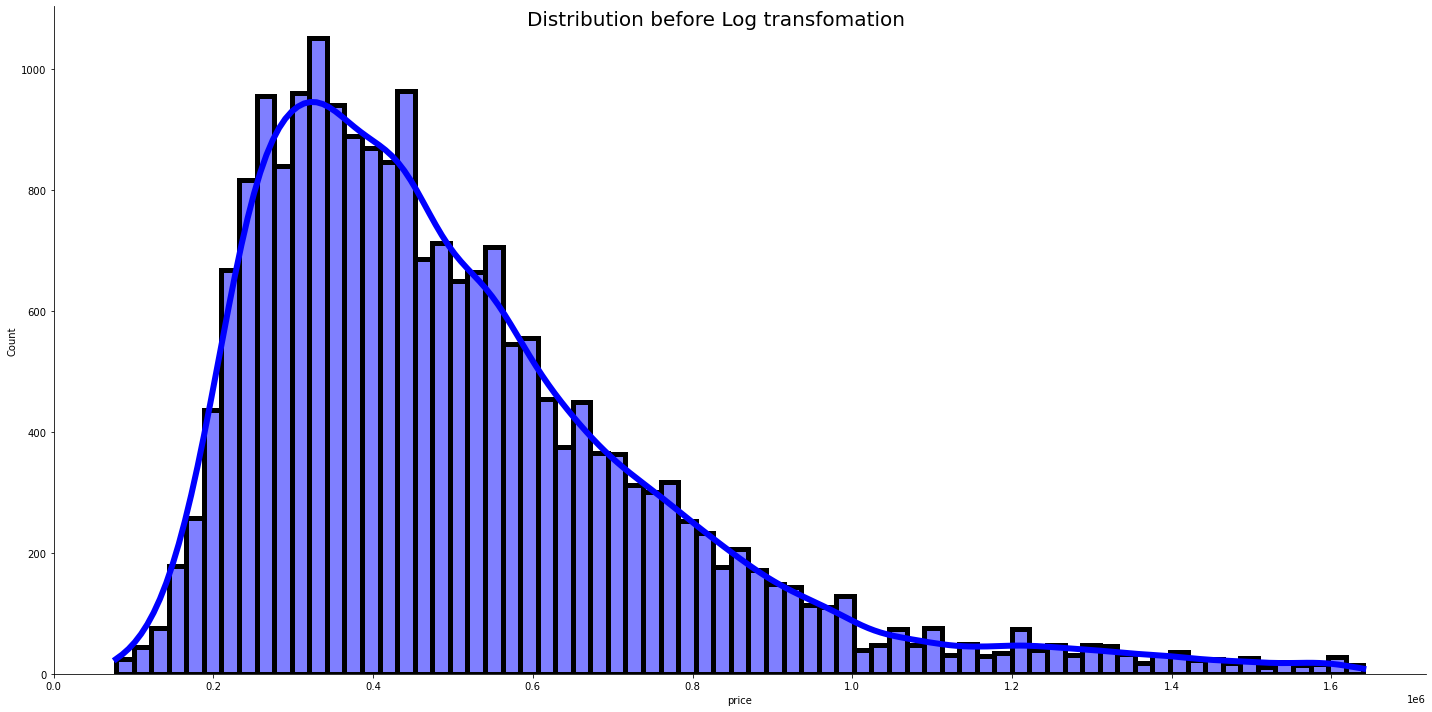

In [37]:
# price distribution

ax = sns.displot(kc_data['price'], kde = True, line_kws={'color': 'black', 'lw': 6} , color = "blue", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

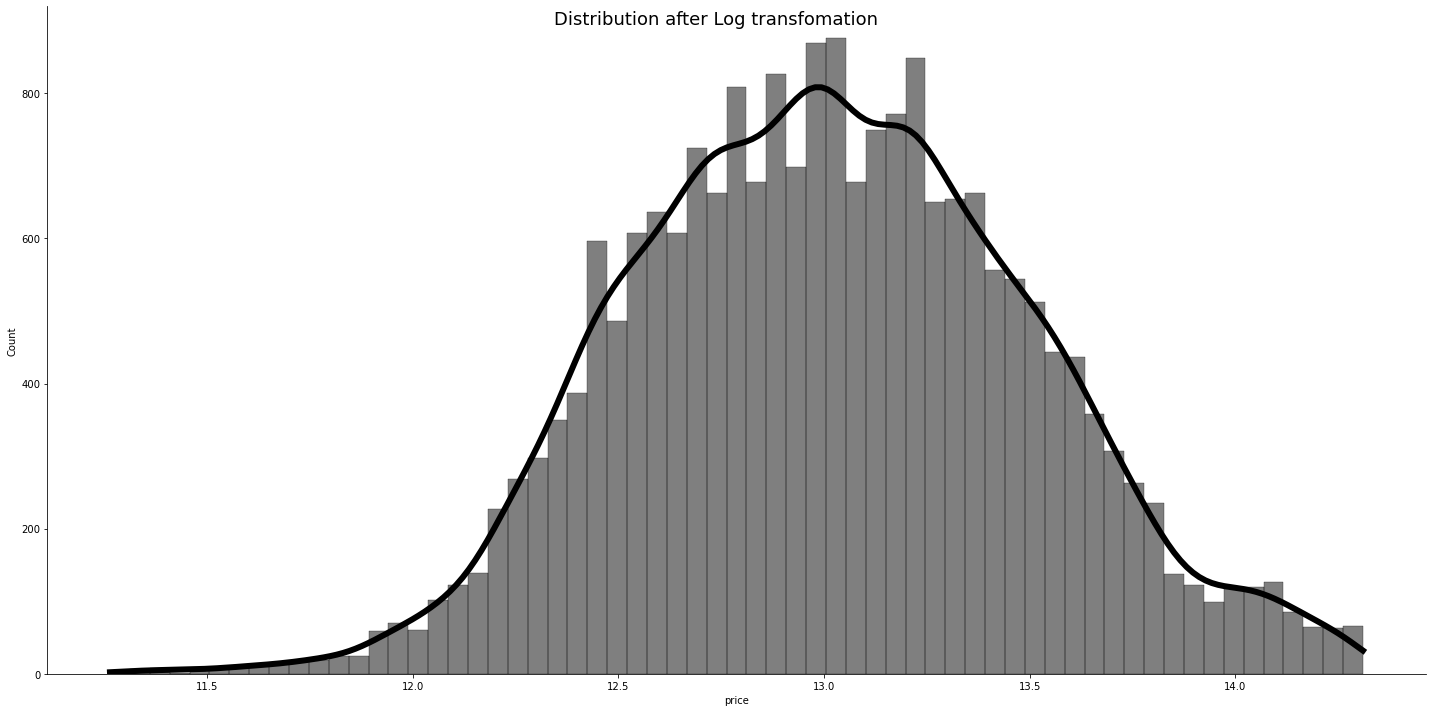

In [38]:
# Normalize price distribution

p = np.log(kc_data['price'])

ax = sns.displot(p, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 0.3)

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [39]:
#maximum price and minimum price

max_price = kc_data['price'].max()

min_price = kc_data['price'].min()

avg_price = kc_data['price'].mean()

max_price, min_price, avg_price

(1640000.0, 78000.0, 505219.53701762744)

###### 3.2.1.1.2 Sqft_lot

Text(0.5, 0.98, 'Distribution before Log transfomation')

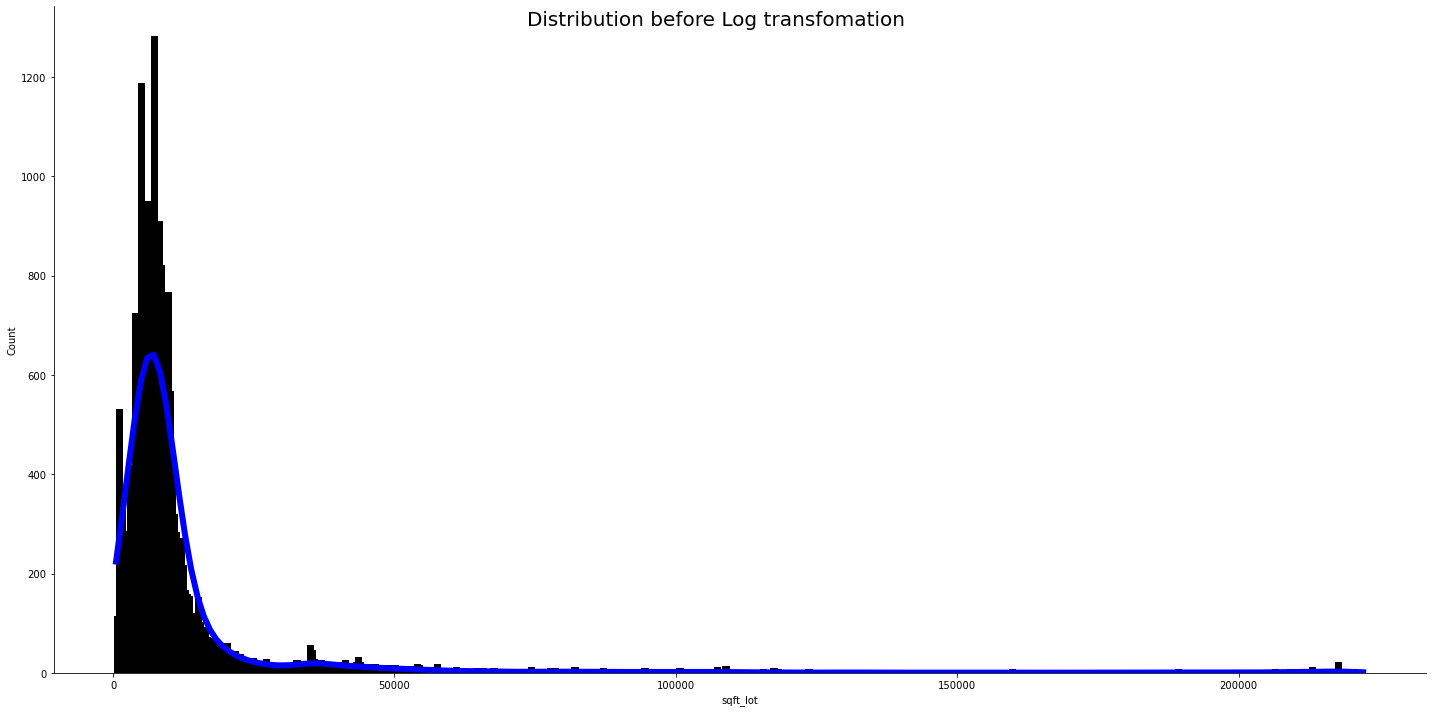

In [40]:
ax = sns.displot(kc_data['sqft_lot'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

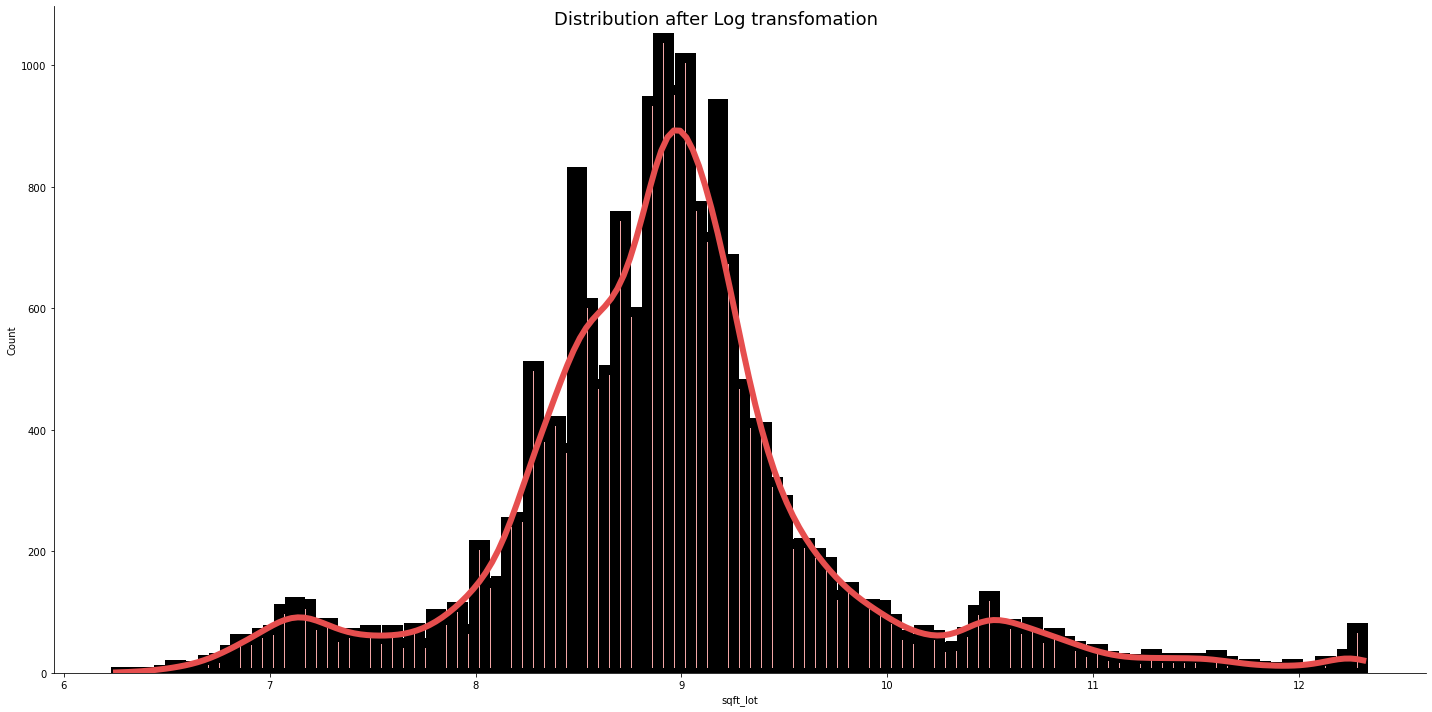

In [41]:
#Normalize the sqft_lot data

l = np.log(kc_data['sqft_lot'])

ax = sns.displot(l, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "#e64e4e", height=10, aspect=2, 
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [42]:
max_lot = kc_data['sqft_lot'].max()

min_lot = kc_data['sqft_lot'].min()

avg_lot = kc_data['sqft_lot'].mean()

max_lot, min_lot, avg_lot

(222156, 520, 12448.406479275845)

In [71]:
price_per_sqft_lot = kc_data['price'].mean()/kc_data['sqft_lot'].mean()

price_per_sqft_lot

40.58507712282041

###### 3.2.1.1.3 Sqft_living

Text(0.5, 0.98, 'Distribution before Log transfomation')

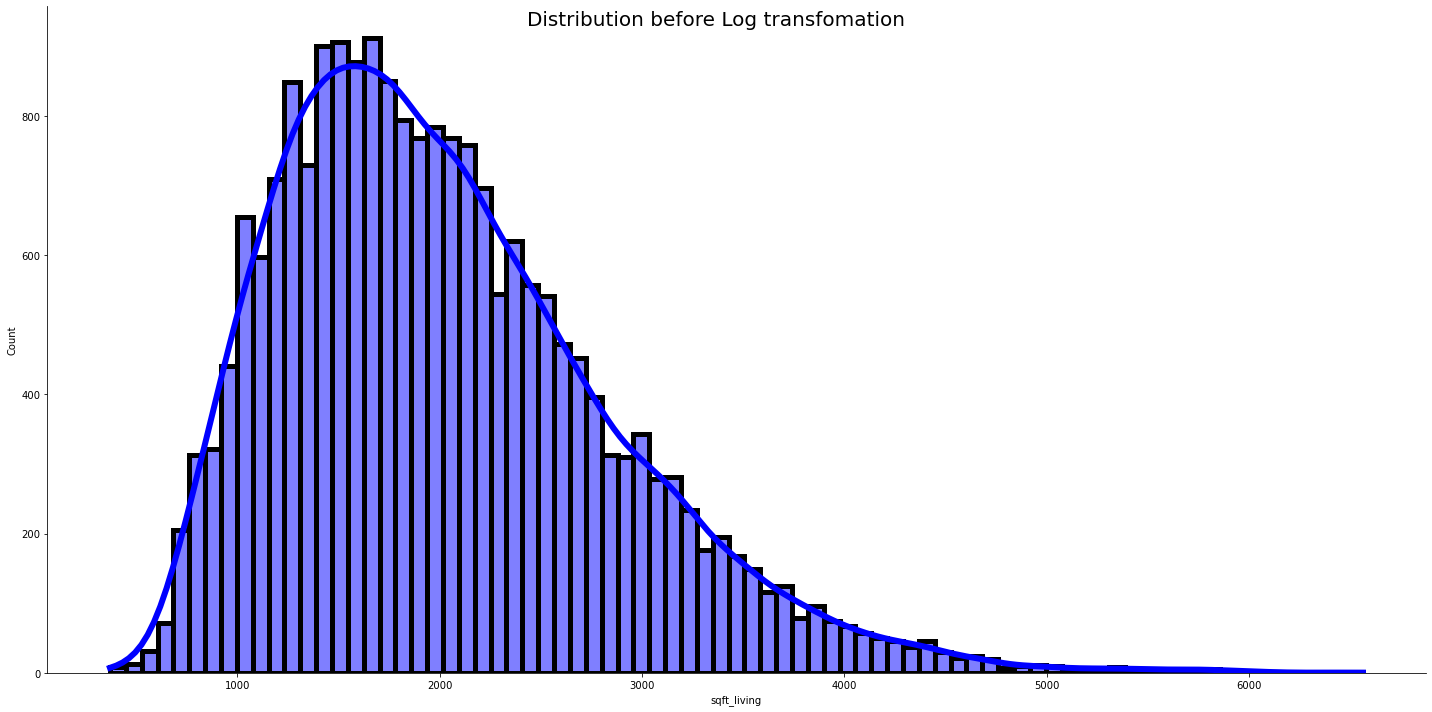

In [43]:
ax = sns.displot(kc_data['sqft_living'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

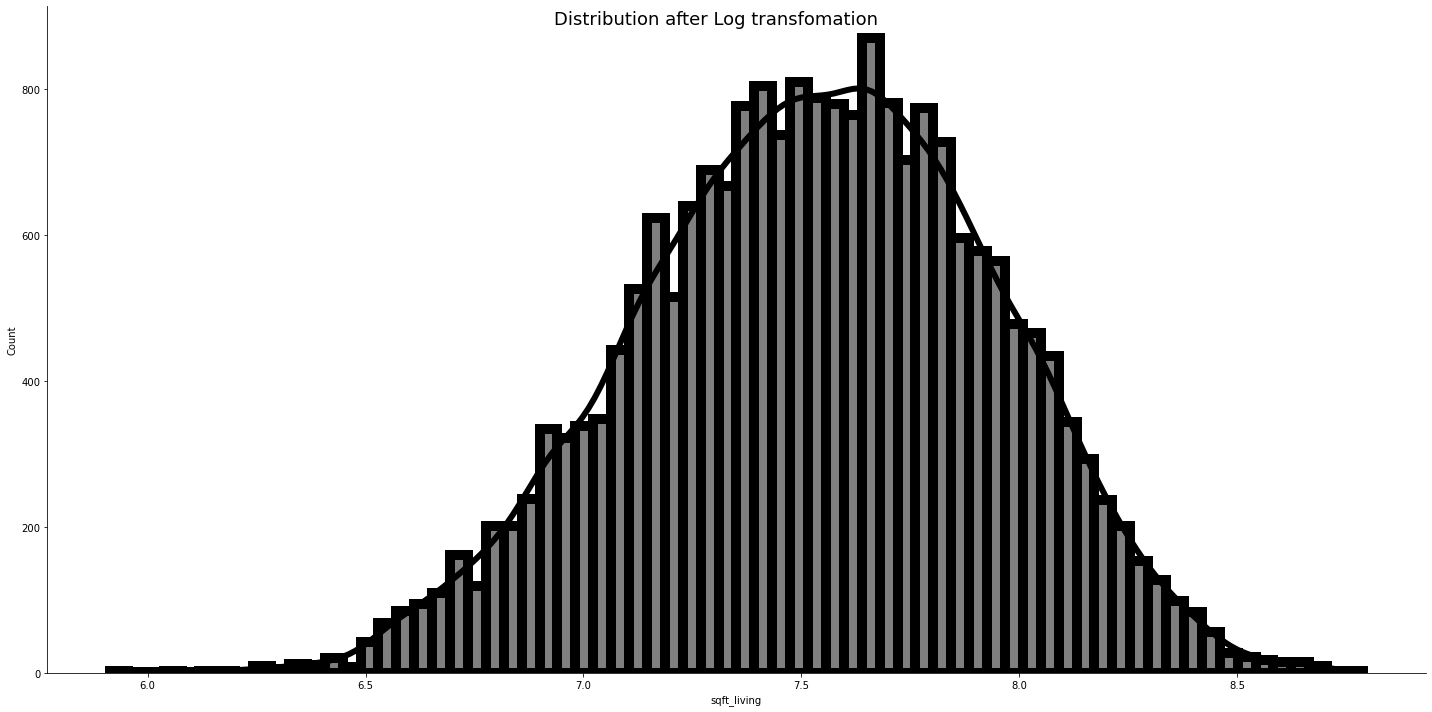

In [44]:
liv = np.log(kc_data['sqft_living'])

ax = sns.displot(liv, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [45]:
max_living = kc_data['sqft_living'].max()

min_living = kc_data['sqft_living'].min()

avg_living = kc_data['sqft_living'].mean()

max_living, min_living, avg_living

(6563, 370, 2021.6008575512149)

In [72]:
price_per_sqft_living = kc_data['price'].mean()/kc_data['sqft_living'].mean()

price_per_sqft_living

249.9106265861031

###### 3.2.1.1.4 Sqft_above

Text(0.5, 0.98, 'Distribution before Log transfomation')

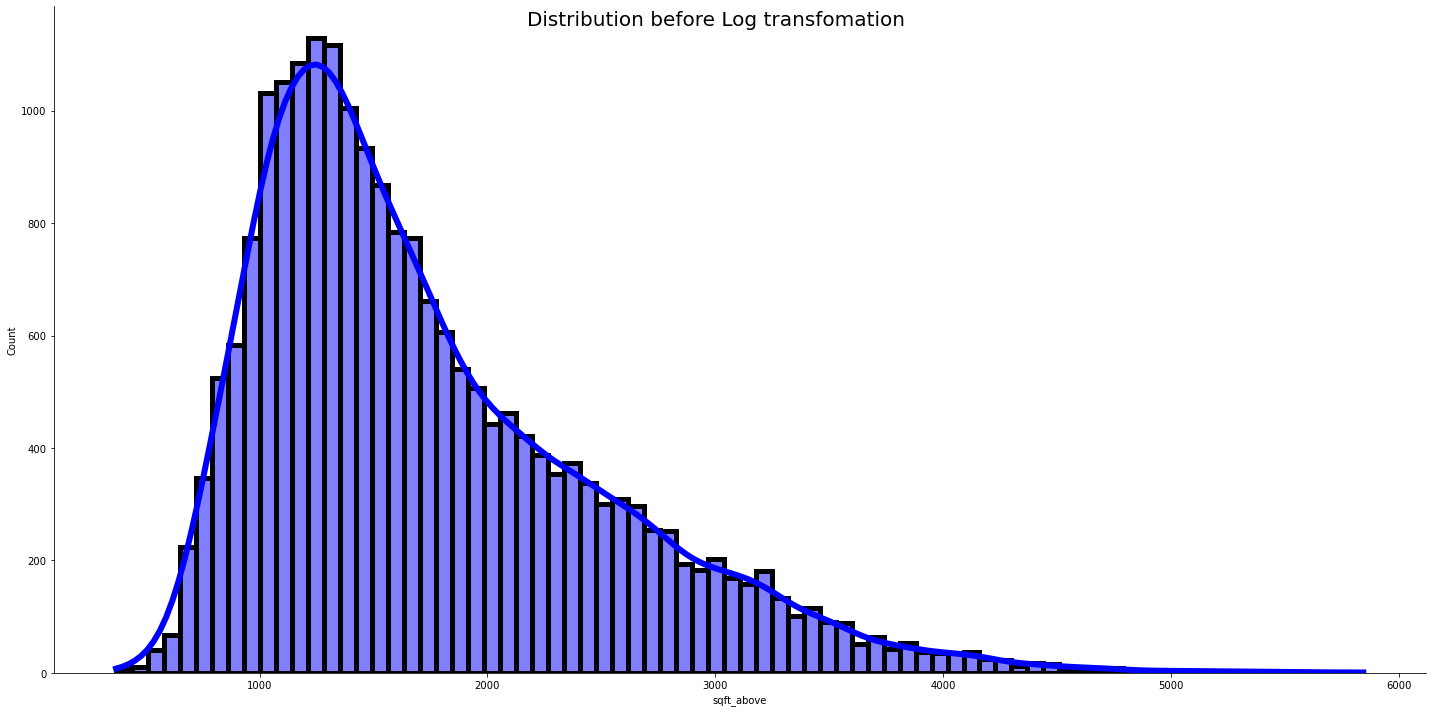

In [46]:
ax = sns.displot(kc_data['sqft_above'], kde = True, line_kws={'color': 'blue', 'lw': 6} , color = "blue", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)

Text(0.5, 0.98, 'Distribution after Log transfomation')

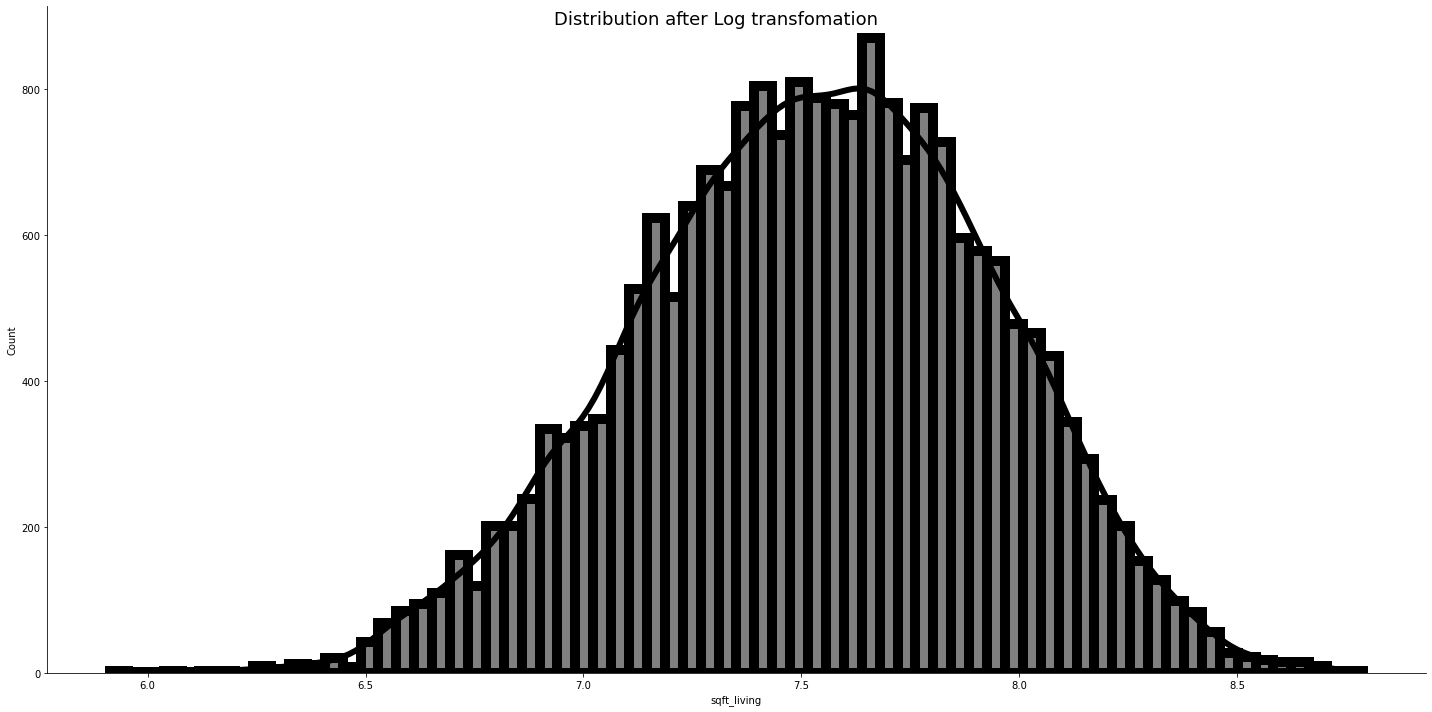

In [47]:
ab= np.log(kc_data['sqft_above'])

ax = sns.displot(liv, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 10 )

ax.fig.suptitle('Distribution after Log transfomation', size = 18)

In [79]:
# maximum, minimum, average sqft_above

max_above = kc_data['sqft_above'].max()

min_above = kc_data['sqft_above'].min()

avg_above = kc_data['sqft_above'].mean()

max_above, min_above, avg_above

(5844, 370, 1742.4222486898523)

In [80]:
# price per sqft_above
price_per_sqft_above = kc_data['price'].mean()/kc_data['sqft_above'].mean()

price_per_sqft_above

289.95241388676476

The cost per sqft living and sqft above ranges from 200 dollars to 300 dollars.

##### 3.2.1.2 Categorical  Data

   1. Number of Bedrooms per house
   2.Number of Bathrooms per house
   3. Condition
   4. Year Built
   5. waterfront
   6. view
   7. Year

###### 3.2.1.2.1 Bathrooms

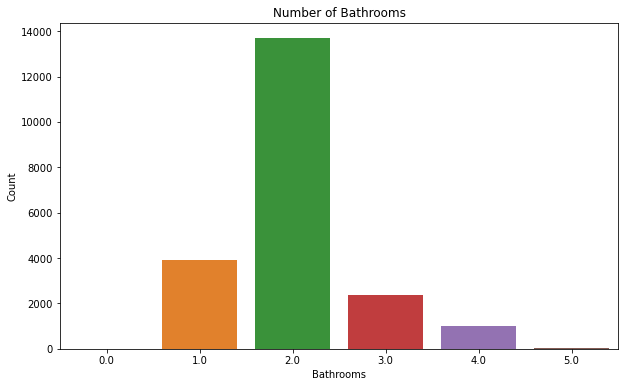

In [49]:
#bathroom count plot

plt.figure(figsize=(10,6))

sns.countplot(x='bathrooms', data= kc_data)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [50]:
bathroom_count = (kc_data['bathrooms']).value_counts()

bathroom_count

2.0    13691
1.0     3915
3.0     2367
4.0      992
5.0       21
0.0        4
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

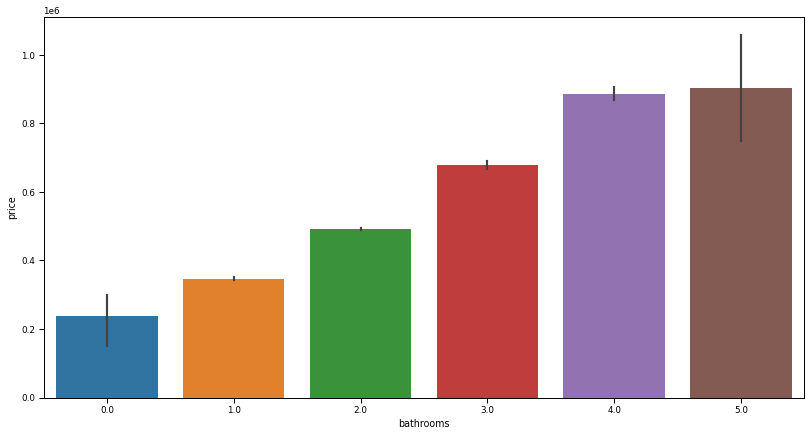

In [65]:
#bathroom vs Price

plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bathrooms', y='price', data=kc_data)

In [76]:
bathroom_price = kc_data.groupby('bathrooms')['price'].mean().sort_values()

bathroom_price

bathrooms
0.0    237375.000000
1.0    346725.667944
2.0    492244.505953
3.0    679317.046895
4.0    887041.956653
5.0    903285.238095
Name: price, dtype: float64

From this analysis we can see that most houses in King County had 2 bathrooms. 

The houses with more bathrooms had the highest prices.

###### 3.2.1.2.2 Bedrooms

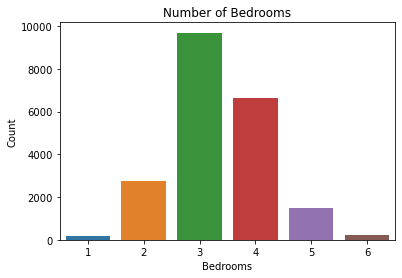

In [52]:
sns.countplot(x='bedrooms',data=kc_data)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Bedrooms vs Price')

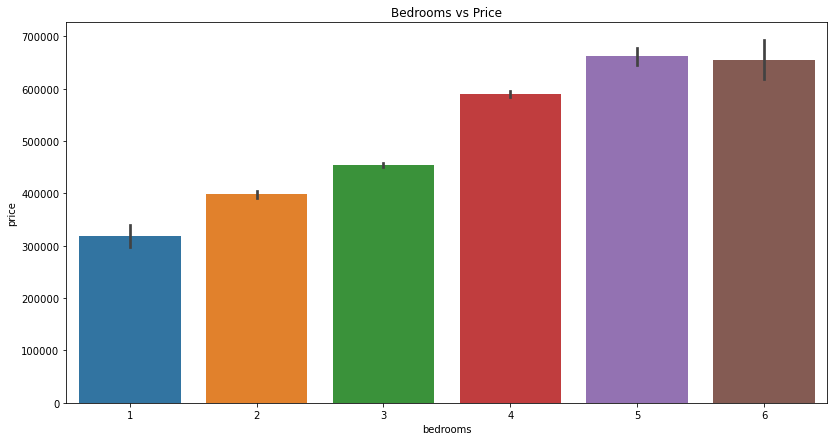

In [53]:
#bedroom count vs price

plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bedrooms', y='price', data=kc_data)
plt.title('Bedrooms vs Price')

In [77]:
bedroom_price = kc_data.groupby('bedrooms')['price'].mean().sort_values()

bedroom_price

bedrooms
1    317948.379487
2    398085.762514
3    453869.124278
4    589549.414032
6    654960.133603
5    661724.389681
Name: price, dtype: float64

From this analysis we can see that most houses in King County had 3 bedrooms. 

The houses with 5 bedrooms had the highest prices.

###### 3.2.1.2.3 Condition

<AxesSubplot:xlabel='condition', ylabel='count'>

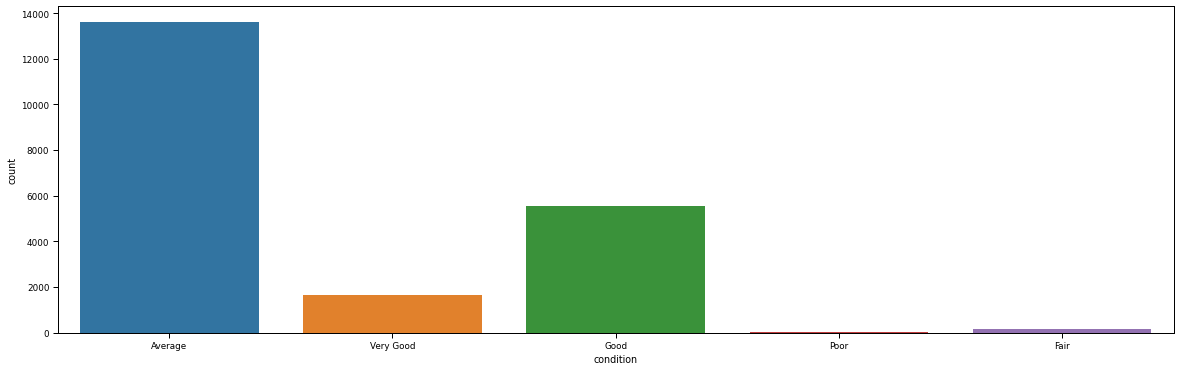

In [55]:

plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='condition',data=kc_data)

Text(0.5, 1.0, 'Condition vs Price')

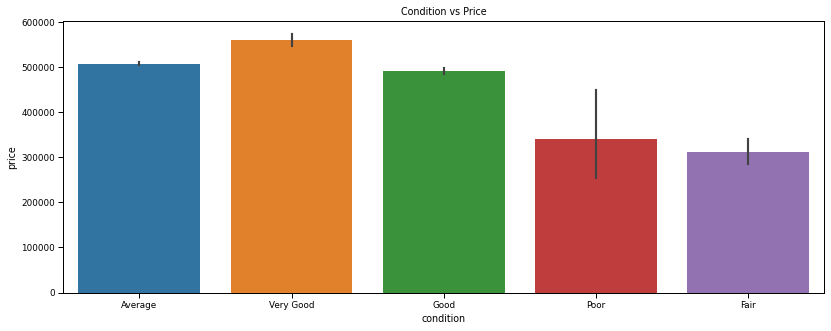

In [56]:
#condition count vs price
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.barplot(x='condition', y='price', data=kc_data)
plt.title('Condition vs Price')

In [57]:
kc_data['condition'].value_counts()

Average      13622
Good          5539
Very Good     1635
Fair           165
Poor            29
Name: condition, dtype: int64

In [81]:
condition_price = kc_data.groupby('condition')['price'].mean().sort_values()

condition_price.round()

condition
Fair         312114.0
Poor         341067.0
Good         490213.0
Average      507394.0
Very Good    560339.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County were in an average condition. 

The houses with a very good condition had the highest prices.

###### 3.2.1.2.4 Year Built

<AxesSubplot:xlabel='yr_built', ylabel='count'>

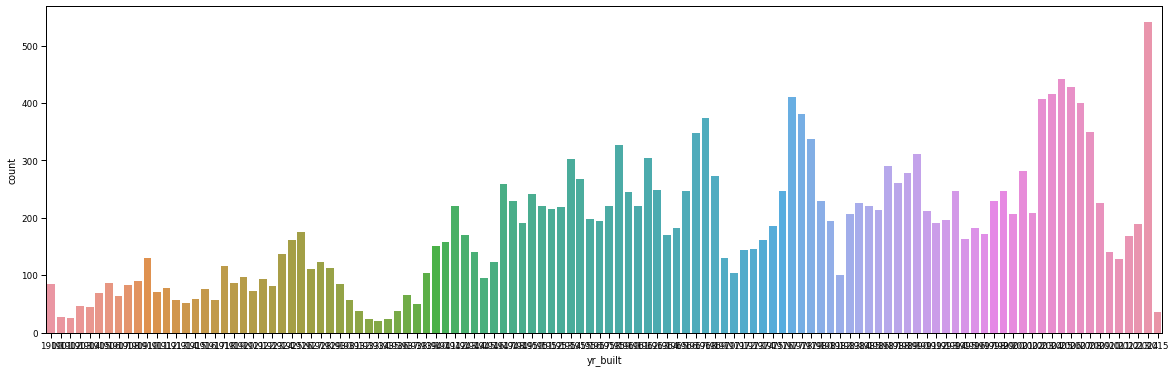

In [59]:
plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='yr_built',data=kc_data)

Text(0.5, 1.0, 'Yr_Built vs Price')

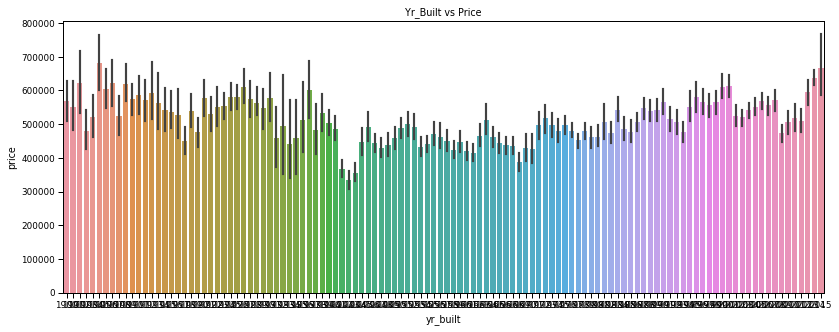

In [60]:
#Yr Built count vs price
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.barplot(x='yr_built', y='price', data=kc_data)
plt.title('Yr_Built vs Price')

In [91]:
kc_data['yr_built'].value_counts().head(10)

2014    541
2005    441
2006    428
2004    416
1977    411
2003    407
2007    400
1978    381
1968    374
2008    350
Name: yr_built, dtype: int64

In [90]:
yr_built_price = kc_data.groupby('yr_built')['price'].mean().sort_values(ascending = False)

yr_built_price.round().head(10)

yr_built
1905    681027.0
2015    667968.0
2014    638263.0
1902    622546.0
1907    622398.0
1909    620624.0
2001    613268.0
1927    611657.0
2000    611497.0
1906    603937.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County were built in the 2000s.

Both the old and new houses had the highest prices.

###### 3.2.1.2.5 Waterfront

<AxesSubplot:xlabel='waterfront', ylabel='count'>

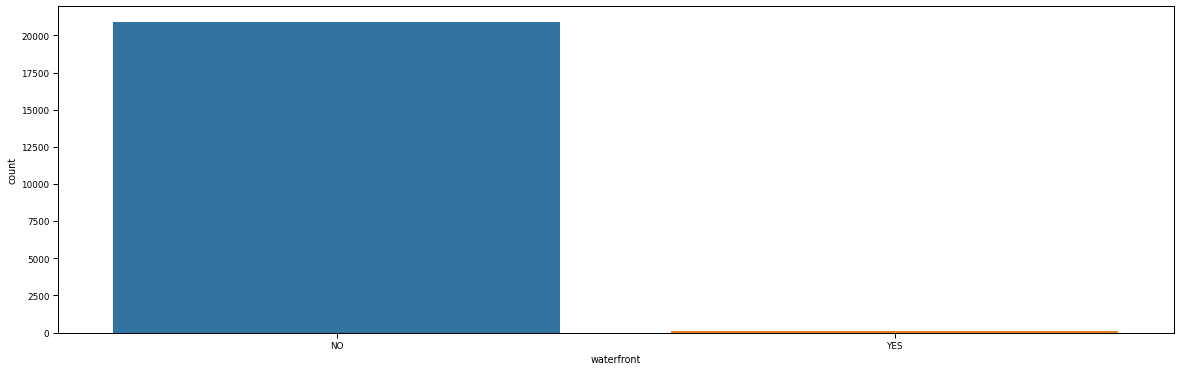

In [96]:
plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='waterfront',data=kc_data)

In [97]:
kc_data['waterfront'].value_counts().head(10)

NO     20911
YES       79
Name: waterfront, dtype: int64

In [99]:
waterfront_price = kc_data.groupby('waterfront')['price'].mean().sort_values(ascending = False)

waterfront_price.round().head(10)

waterfront
YES    923220.0
NO     503640.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County have no waterfront.

However, the houses with waterfront have the highest prices.

###### 3.2.1.2.6 View

<AxesSubplot:xlabel='view', ylabel='count'>

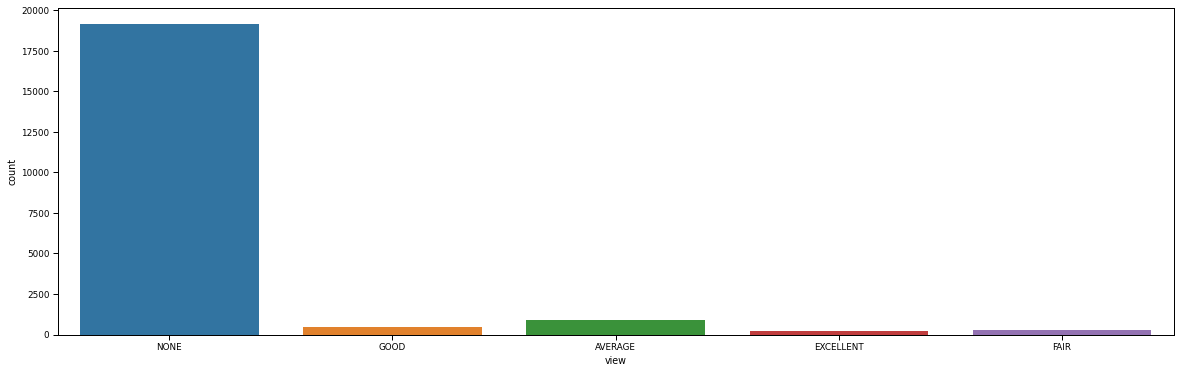

In [100]:
plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.countplot(x='view',data=kc_data)

In [101]:
kc_data['view'].value_counts().head(10)

NONE         19157
AVERAGE        882
GOOD           434
FAIR           304
EXCELLENT      213
Name: view, dtype: int64

In [102]:
view_price = kc_data.groupby('view')['price'].mean().sort_values(ascending = False)

view_price.round().head(10)

view
EXCELLENT    957691.0
GOOD         823257.0
AVERAGE      704297.0
FAIR         701839.0
NONE         480698.0
Name: price, dtype: float64

From this analysis we can see that most houses in King County have no view.

However, the houses with an excellent view have the highest prices.

###### 3.2.1.2.7 Year

In [251]:
kc_data['year'].value_counts()

2014    14218
2015     6772
Name: year, dtype: int64

In [252]:
year_price = kc_data.groupby('year')['price'].mean()

year_price

year
2014    504812.516950
2015    506074.086828
Name: price, dtype: float64

Houses sold in 2015 had higher prices as compared to houses sold in 2014

## 4. Data Modeling

## 4.1. Linearity of the Variables

In [253]:
waterfront = {"waterfront":     {"YES": 1, "NO": 0}}

kc_data = kc_data.replace(waterfront)
kc_data.head()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,condition,waterfront,yr_built,view,year,month
0,221900.0,5650,1180,1180,1.0,3,Average,0,1955,NONE,2014,10
1,538000.0,7242,2570,2170,2.0,3,Average,0,1951,NONE,2014,12
2,180000.0,10000,770,770,1.0,2,Average,0,1933,NONE,2015,2
3,604000.0,5000,1960,1050,3.0,4,Very Good,0,1965,NONE,2014,12
4,510000.0,8080,1680,1680,2.0,3,Average,0,1987,NONE,2015,2


In [254]:
kc_data['view'].value_counts()

NONE         19157
AVERAGE        882
GOOD           434
FAIR           304
EXCELLENT      213
Name: view, dtype: int64

In [255]:
kc_data["condition"] = kc_data["condition"].astype('category')

kc_data["condition_num"] = kc_data["condition"].cat.codes

kc_data["view"] = kc_data["view"].astype('category')

kc_data["view_num"] = kc_data["view"].cat.codes

#drop view and condition columns
kc_data.drop(['condition','view'], axis= 1, inplace=True)

kc_data.head()


,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,waterfront,yr_built,year,month,condition_num,view_num
0,221900.0,5650,1180,1180,1.0,3,0,1955,2014,10,0,4
1,538000.0,7242,2570,2170,2.0,3,0,1951,2014,12,0,4
2,180000.0,10000,770,770,1.0,2,0,1933,2015,2,0,4
3,604000.0,5000,1960,1050,3.0,4,0,1965,2014,12,4,4
4,510000.0,8080,1680,1680,2.0,3,0,1987,2015,2,0,4


In [256]:
kc_data.head()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,waterfront,yr_built,year,month,condition_num,view_num
0,221900.0,5650,1180,1180,1.0,3,0,1955,2014,10,0,4
1,538000.0,7242,2570,2170,2.0,3,0,1951,2014,12,0,4
2,180000.0,10000,770,770,1.0,2,0,1933,2015,2,0,4
3,604000.0,5000,1960,1050,3.0,4,0,1965,2014,12,4,4
4,510000.0,8080,1680,1680,2.0,3,0,1987,2015,2,0,4


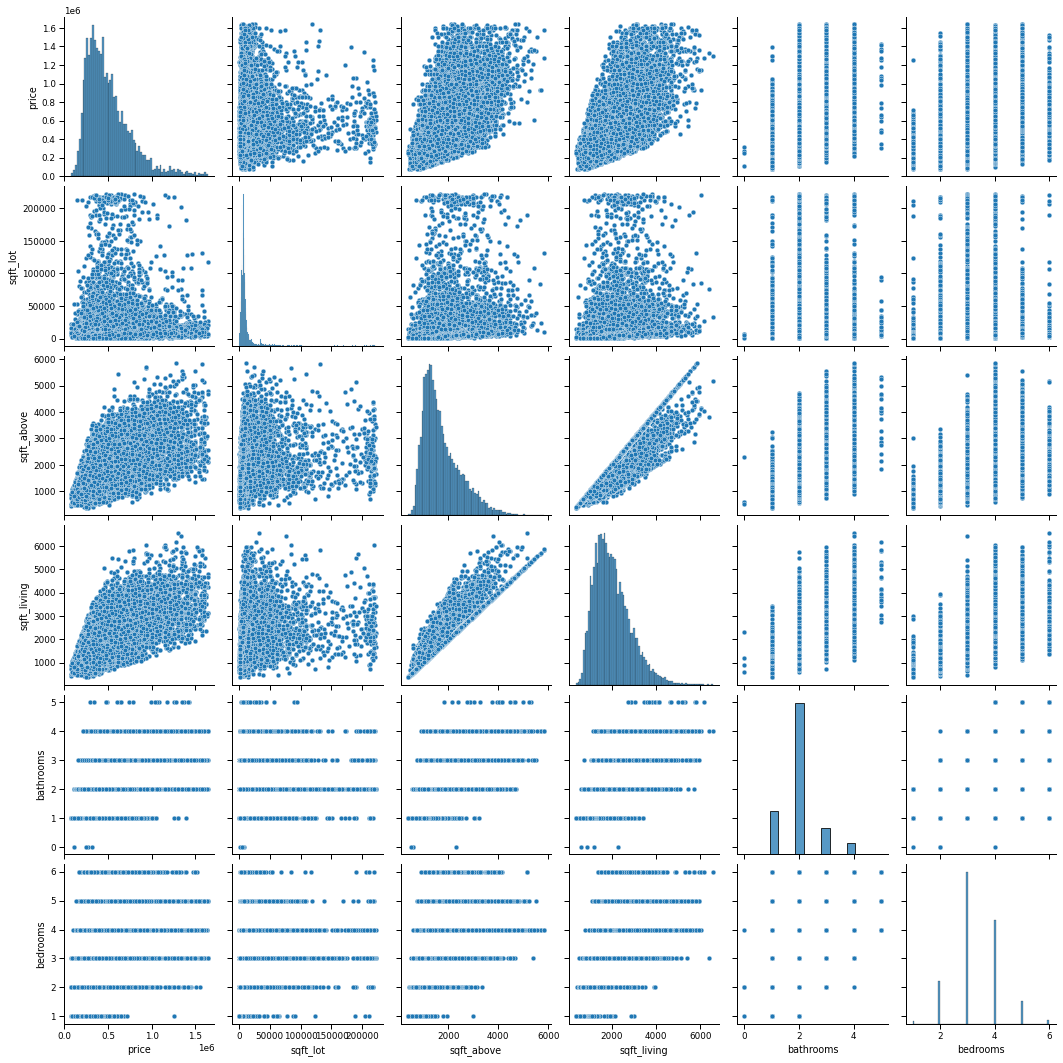

In [257]:
#Scatter plot to show linearity

sns.set_context("paper", font_scale= 1)

continuous_data = kc_data.loc[:,["price", "sqft_lot", "sqft_above", "sqft_living", "bathrooms", "bedrooms"]]
                              
n = sns.pairplot(continuous_data)


There is a positive linear relationship between the price and "sft_living" and "sqft_above".

There is no linear realtionship between price and "bathrooms" and "bedrooms"

### 4.1.2 Correlation of the Variables

We are going to use the Pearson correlation which measures the linear correlation between two continuous variables, and it relies on the two following assumptions:

1. There is a linear relationship between the two variables i.e. y = ax + b.

2. x and y both follow a normal distribution.

Kindly note that correlation does not show causation between two variables however, causation cannot occur without correlation.

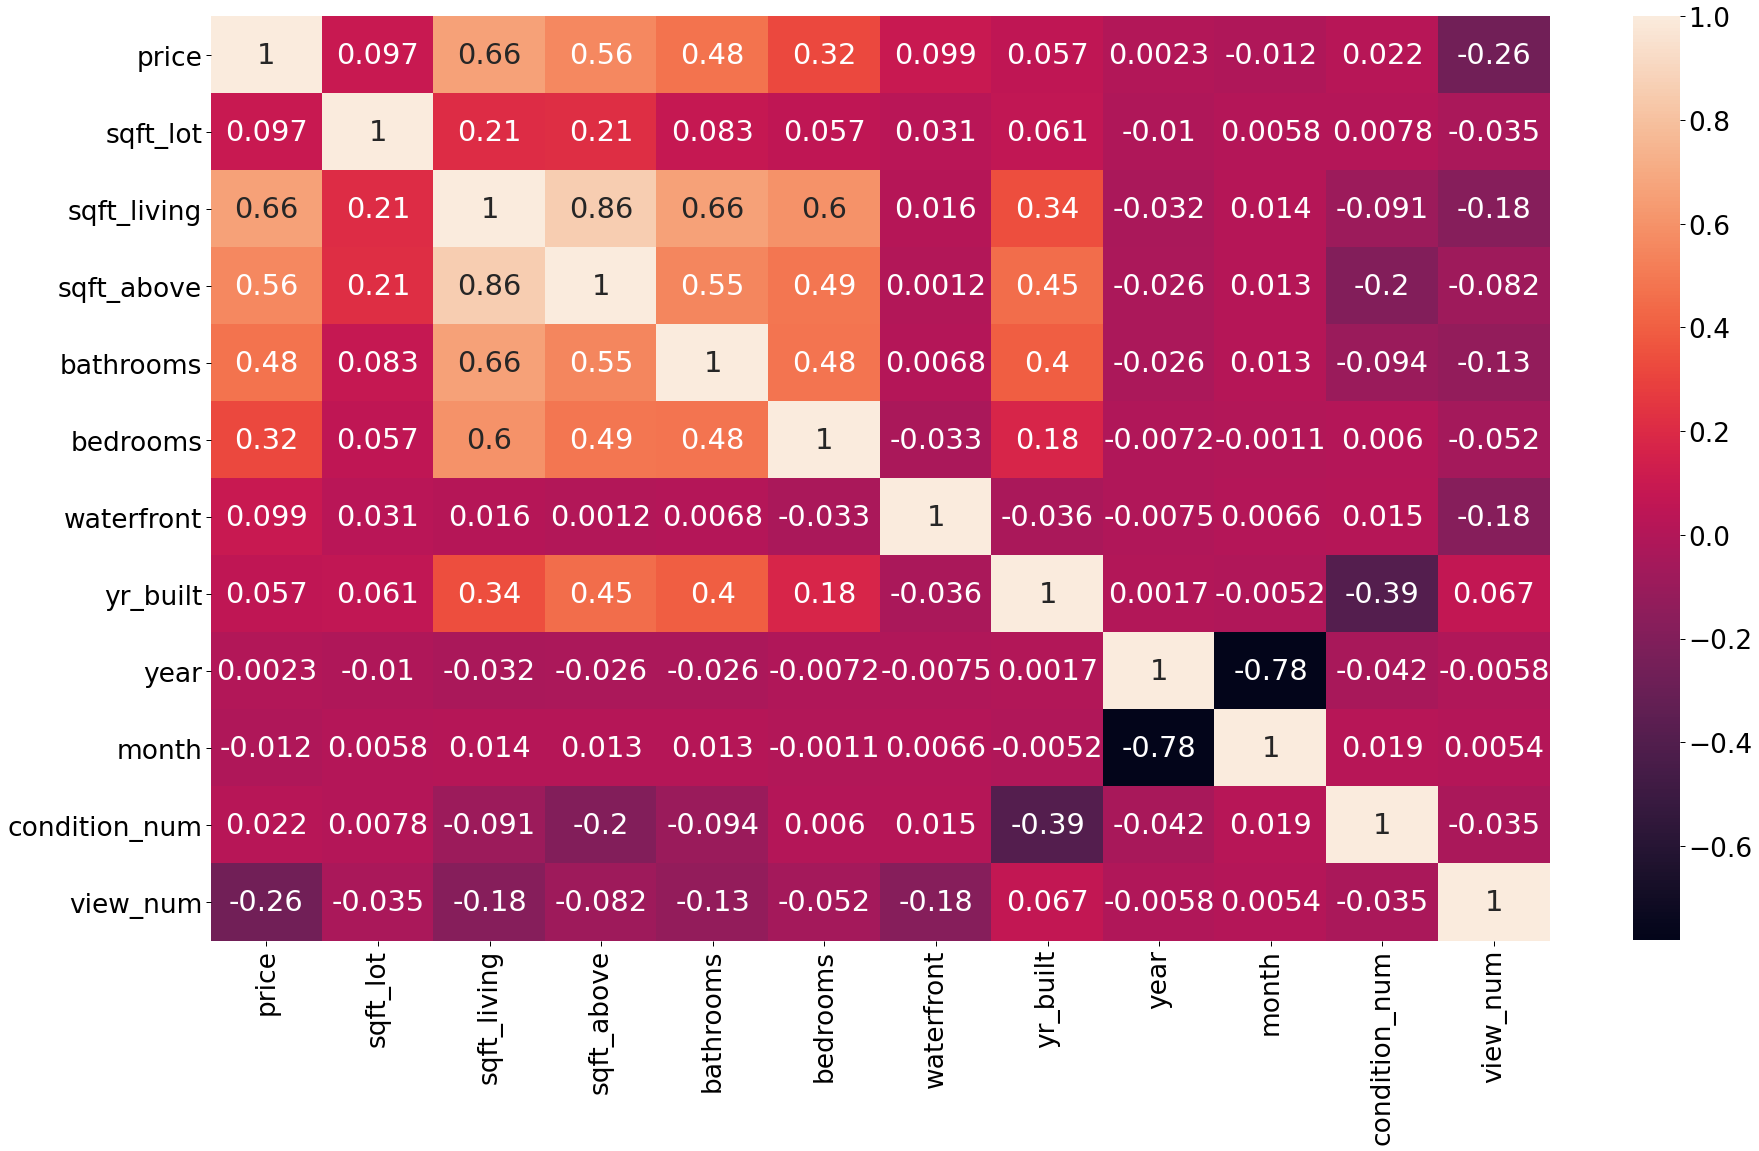

In [306]:
# heatmap to show correlation
plt.figure(figsize=(30,17))
sns.set_context("paper", font_scale= 3)
sns.heatmap(kc_data.corr(), annot = True )
plt.show()

## 4.2. Regression Models

### 4.2.1 Simple Linear Regression Model

#### 4.2.1.1 Price vs Sqft_Living

In [301]:
results_1 = smf.ols('price ~ sqft_living', data = kc_data).fit()

results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.636e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:21:52   Log-Likelihood:            -2.8531e+05
No. Observations:               20990   AIC:                         5.706e+05
Df Residuals:                   20988   BIC:                         5.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.442e+04   3551.106     23.774      0.000    7.75e+04    9.14e+04
sqft_living   208.1493      1.627    127.900      0.000     204.959     211.339
==============================================================================
Omnibus:                     3551.631   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7667.963
Skew:                           0.998   Prob(JB):                         0.00
Kurtosis:                       5.187   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets

train_data,test_data=train_test_split(kc_data,train_size=0.8,random_state=3)

# Step 2 : Train the model on the Training set
reg=LinearRegression()

x_train=np.array(train_data['sqft_living']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results

x_test=np.array(test_data['sqft_living']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)

pred=reg.predict(x_test)


print('linear model')

mean_squared_error = mean_squared_error(y_test,pred)

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))

print('R squared training',round(reg.score(x_train,y_train),3))

print('R sqaured testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

linear model
Sqaured mean error 196033.53
R squared training 0.44
R sqaured testing 0.429
intercept [85214.32146038]
coefficient [[207.50866829]]


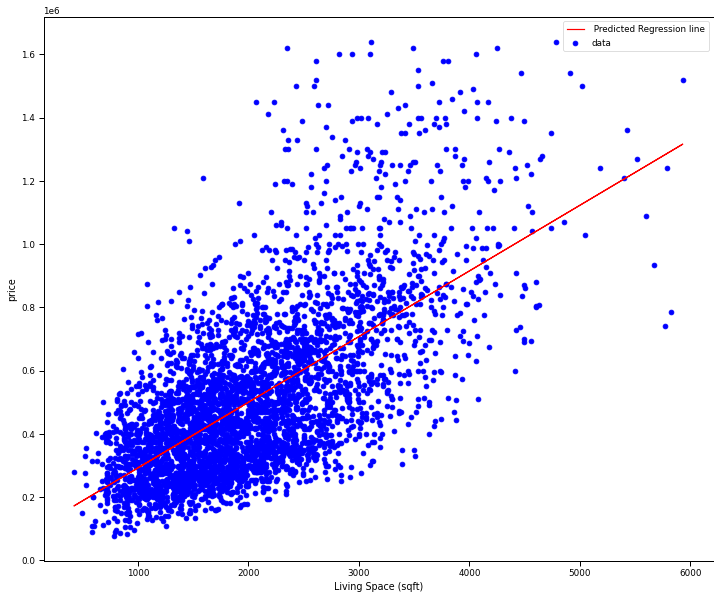

In [259]:
_, ax = plt.subplots(figsize= (12, 10))
 
plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#### 4.2.1.2 Price vs Sqft_Above

In [303]:
results_2 = smf.ols('price ~ sqft_above', data = kc_data).fit()

results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9617.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:22:19   Log-Likelihood:            -2.8740e+05
No. Observations:               20990   AIC:                         5.748e+05
Df Residuals:                   20988   BIC:                         5.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.733e+05   3692.199     46.947      0.000    1.66e+05    1.81e+05
sqft_above   190.4711      1.942     98.068      0.000     186.664     194.278
==============================================================================
Omnibus:                     4455.498   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10229.580
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       5.427   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets
train_data,test_data=train_test_split(kc_data,train_size=0.8,random_state=3)


reg=LinearRegression()

# Step 2 : Train the model on the Training set
x_train=np.array(train_data['sqft_above']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results
x_test=np.array(test_data['sqft_above']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)

pred=reg.predict(x_test)

print('linear model')

mean_squared_error = mean_squared_error(y_test,pred)

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))

print('R squared training',round(reg.score(x_train,y_train),3))

print('R sqaured testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

linear model
Sqaured mean error 214828.58
R squared training 0.314
R sqaured testing 0.314
intercept [173162.85914915]
coefficient [[190.32328604]]


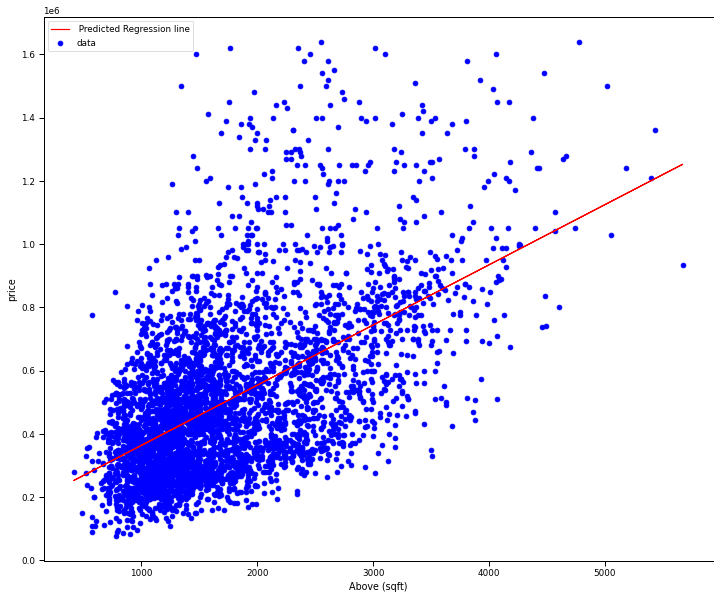

In [192]:
_, ax = plt.subplots(figsize= (12, 10))
 
plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.xlabel('Above (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### 4.2.1 Multiple Linear Regression Model

In [304]:
m_1 = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront'

result3 = smf.ols(m_1, data = kc_data).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3587.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:24:26   Log-Likelihood:            -2.8487e+05
No. Observations:               20990   AIC:                         5.698e+05
Df Residuals:                   20984   BIC:                         5.698e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.415e+05   5498.255     25.739      

## 5. Regression Results

### 5.1. Price and Sft_living

R-squared: 0.438
    
p_value: 0 

Interpretation: The r-squared value, 0.438, shows that the model can account for about 43.8% of the variability of price around its mean. 

The null hypothesis for the simple linear regression is that there is no relationship between the chosen variable and the response variable. 

All of the p-values round to 0, which means we can reject the null hypothesis.  


### 5.2. Price and Sft_above

R-squared: 0.314
    
p_value: 0 

Interpretation: The r-squared value, 0.341, shows that the model can account for about 34.1% of the variability of price around its mean. 

The null hypothesis for the simple linear regression is that there is no relationship between the chosen variable and the response variable. 

All of the p-values round to 0, which means we can reject the null hypothesis. 

### 5.3. Price and (bedrooms + bathrooms + sqft_living + sqft_lot + waterfront)

R-squared: 0.461
   
    
p_value: 0

Interpretation: The r-squared value, 0.461, shows that the model can account for about 46% of the variability of price around its mean. 

The null hypothesis for multiple regression is that there is no relationship between the chosen variables and the response variable. 

All of the p-values round to 0, which means we can reject the null hypothesis. 


## 6. Conclusion

#### Univariate Anlysis

* The price per sqft living and sqft above ranges from 200 dollars to 300 dollars. 

* Most houses in King County had 2 bathrooms and 3 bedrooms. The houses with more bathrooms and bedrooms had the highest prices.

* In King County most were houses were in an average condition and the houses with a very good condition had the highest prices.

* Most of houses were built in the 2000s however, both the old and new houses had the highest prices.

* Most of the houses had no waterfront and no view however, the houses with a waterfront and a view had the highest prices.

* Lastly the houses sold in 2015 had higher prices as compared to houses sold in 2014.



#### Regression Model Conclusion

The multiple linear regression model is better than the two simple regression models as it had a higher Rsquared value. This shows that categorical variables had a positive effect on the prices as illustrated in the univariate analysis. 

Therefore adding these variables to the predictive model made the model to be a bit stronger. 


In conclusion the real estate agency should review the sqft of the living space/ the ground above the basement when setting their house prices as there is a linear relationship between these variables. 

Factors like bathrooms, bedrooms, having a waterfront and an excellent view have a positive effect on the house prices. Lastly, the house prices seemed to have increased in 2015 they should therefore consider inflation when setting house prices in the future.